In [2]:
import numpy as np
import matplotlib.pyplot as plt
from getdist import plots, MCSamples

In [8]:
%matplotlib inline
plt.rc('font', size=15)
plt.rc('figure', facecolor='w')

## MCMC Two parameters

In [16]:
def load(filename, label='Power Spectrum'):
    d_ = np.load(filename)
    ndim = d_['chain'].shape[-1]
    chains = d_['chain'][5000:, :, :].reshape(-1, ndim)
    names = ["x%s"%i for i in range(ndim)]
    labels =  [r"\alpha"] + ["A%d"%i for i in range(ndim-1)]
    samples = MCSamples(samples=chains, names=names, labels=labels, label=label,
                       settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3, 'smooth_scale_1D':0.3})    
    return samples

In [5]:
def get_1sigma(filename):
    d_ = np.load(filename)
    ndim = d_['chain'].shape[1]
    chains = d_['chain'][5000:, :, :].reshape(-1, ndim)
    prcnt = np.percentile(chains[:, 0], [16, 84])
    return (prcnt[1]-prcnt[0])/2.0

In [6]:
alpha_sigmas = {}
for pk in ['pk', 'bk']:
    for wh in [1, ]:
        n = f'{pk}_{wh}'
        a = []
        for kmax_ in np.arange(0.195, 0.055, -0.01):
            a_ = get_1sigma(f'/mnt/data1/BispectrumGLAM/output/glam_{pk}_ht_{wh}_mcmc_kmax{kmax_:.3f}_v2.npz')
            a.append([kmax_, a_])        
        alpha_sigmas[n] = np.array(a)

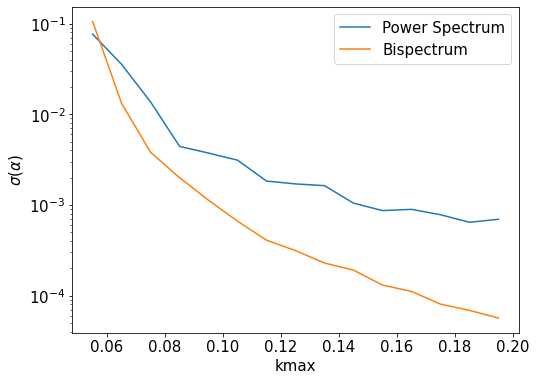

In [9]:
plt.figure(figsize=(8, 6))
plt.plot(*alpha_sigmas['pk_1'].T, label='Power Spectrum')
# plt.plot(*alpha_sigmas['pk_1'].T, 'C0+--')

plt.plot(*alpha_sigmas['bk_1'].T, label='Bispectrum')
# plt.plot(*alpha_sigmas['bk_1'].T, 'C1.--')


plt.yscale('log')
plt.legend()
plt.xlabel('kmax')
plt.ylabel(r'$\sigma (\alpha)$')
plt.show()

Text(0, 0.5, '$\\sigma (\\alpha)$')

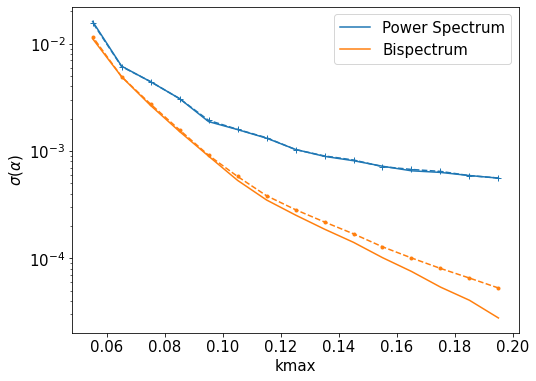

In [43]:
plt.figure(figsize=(8, 6))
plt.plot(*alpha_sigmas['pk_0'].T, label='Power Spectrum')
plt.plot(*alpha_sigmas['pk_1'].T, 'C0+--')

plt.plot(*alpha_sigmas['bk_0'].T, label='Bispectrum')
plt.plot(*alpha_sigmas['bk_1'].T, 'C1.--')



plt.yscale('log')
plt.legend()
plt.xlabel('kmax')
plt.ylabel(r'$\sigma (\alpha)$')

In [17]:
mcmc_bk = load('/mnt/data1/BispectrumGLAM/output/glam_bk_ht_1_mcmc_kmax0.095_v2.npz', 'Bispectrum')
mcmc_pk = load('/mnt/data1/BispectrumGLAM/output/glam_pk_ht_1_mcmc_kmax0.095_v2.npz')

Removed no burn in
Removed no burn in


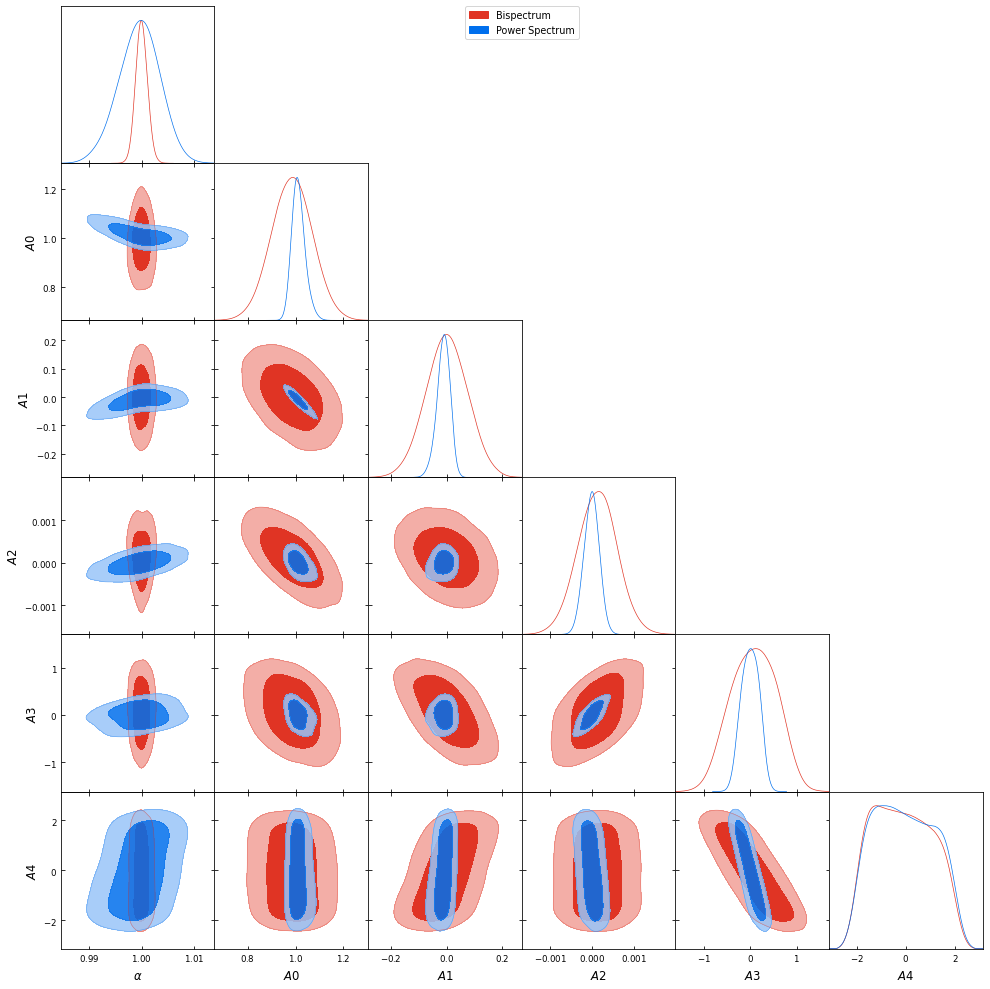

In [21]:
# Triangle plot
g = plots.get_subplot_plotter(width_inch=14)
g.triangle_plot([mcmc_bk, mcmc_pk], filled=True)
plt.savefig('mcmc_poly.png', dpi=300, bbox_inches='tight')

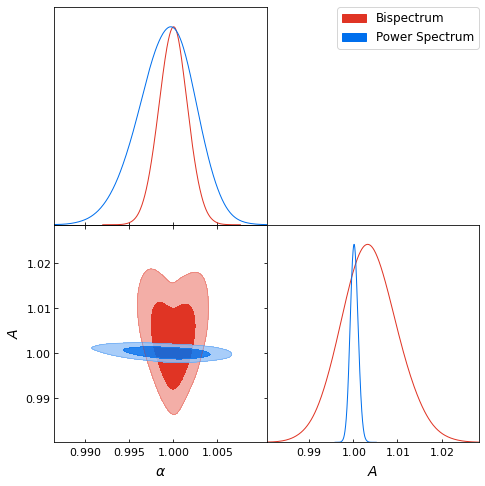

In [45]:
# Triangle plot
g = plots.get_subplot_plotter(width_inch=7)
g.triangle_plot([mcmc_bk, mcmc_pk], filled=True)

In [5]:
chi2s = {}
chi2s['Pk'] = np.loadtxt('pk_chi2.txt').T
chi2s['Bk'] = np.loadtxt('bk_chi2.txt').T

Text(0, 0.5, '$\\chi^{2}$')

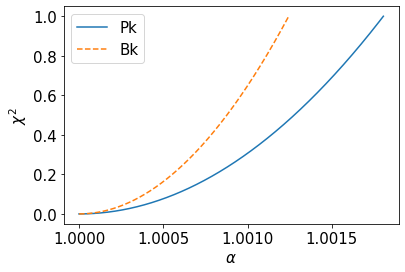

In [8]:
ls = ['-', '--']

for i, (n, c) in enumerate(chi2s.items()):
    plt.plot(c[0], c[1], label=n, ls=ls[i])
    
plt.legend()
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\chi^{2}$')

In [11]:
alphas = {}
alphas['Pk w HF'] = np.loadtxt('pk_alpha_wh.txt').T
alphas['Pk w/o HF'] = np.loadtxt('pk_alpha_woh.txt').T
alphas['Bk w HF'] = np.loadtxt('bk_alpha_wh.txt').T
alphas['Bk w/o HF'] = np.loadtxt('bk_alpha_woh.txt').T

Text(0, 0.5, '$\\sigma(\\alpha)$')

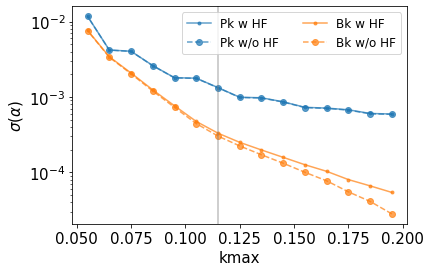

In [24]:
plt.figure(figsize=(6, 4))
ms = 2*['.', 'o']
cl = ['C0', 'C1']

i = 0
for n, v in alphas.items():
    
    cl = 'C0' if 'Pk' in n else 'C1'
    ls = '--' if 'w/o' in n else '-'
    plt.plot(v[0], v[1], label=n, marker=ms[i], color=cl, ls=ls, alpha=0.7)

    i += 1
    
plt.axvline(0.115, alpha=0.5, color='grey')
plt.legend(fontsize=12, ncol=2)
plt.yscale('log')
plt.xlabel('kmax')
plt.ylabel(r'$\sigma(\alpha)$')

Text(0, 0.5, '$\\sigma(\\alpha)$')

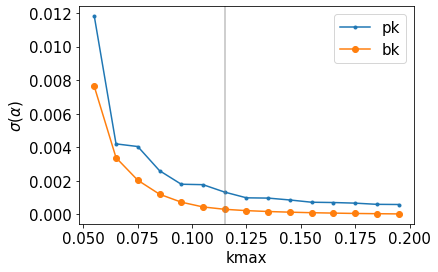

In [23]:
plt.figure(figsize=(6, 4))
ms = ['.', 'o']
i = 0
for n, v in sigmas.items():
    plt.plot(*v, label=n, marker=ms[i])
    i += 1
    
plt.axvline(0.115, alpha=0.5, color='grey')
plt.legend()
# plt.yscale('log')
plt.xlabel('kmax')
plt.ylabel(r'$\sigma(\alpha)$')